**IMPORT LIBRARY YANG DIGUNAKAN**

In [1]:
import pandas as pd
import pickle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

**LOAD MODEL DAN ENCODER**

In [2]:
with open("model_nb.pkl", "rb") as f:
    model = pickle.load(f)

with open("encoder.pkl", "rb") as f:
    le = pickle.load(f)

**LOAD DATA UJI**

In [3]:
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv").values.ravel()

**PREDIKSI DENGAN MODEL**

In [4]:
y_pred = model.predict(X_test)

**EVALUASI HASIL PREDIKSI**

In [5]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.00      0.00      0.00        25
        rain       0.96      0.91      0.94       120
        snow       0.57      0.50      0.53         8
         sun       0.76      0.99      0.86       131

    accuracy                           0.83       293
   macro avg       0.46      0.48      0.47       293
weighted avg       0.75      0.83      0.78       293

Accuracy Score: 0.8293515358361775


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**EVALUASI DENGAN CONFUSION MATRIX**

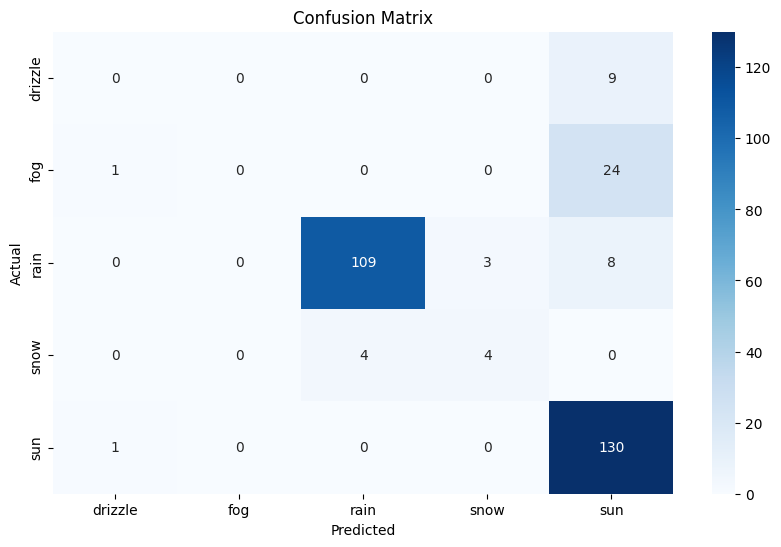

In [6]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()